# Embedding Antibody Sequences using Sapiens

Try out this notebook in your browser: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Merck/Sapiens/main?labpath=notebooks%2F02_sapiens_antibody_embedding.ipynb)

In [2]:
import sapiens

/Users/prihodad/miniforge3/envs/sapiens-huggingface/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Get antibody embeddings

Get a vector representation of each position in a sequence

In [3]:
residue_embed = sapiens.predict_residue_embedding(
    "QVKLQESGAELARPGASVKLSCKASGYTFTNYWMQWVKQRPGQGLDWIGAIYPGDGNTRYTHKFKGKATLTADKSSSTAYMQLSSLASEDSGVYYCARGEGNYAWFAYWGQGTTVTVSS", 
    "H", 
    layer=None
)
residue_embed.shape
# (layer, position in sequence, features)

(5, 119, 128)

Get a single vector for each sequence

In [4]:
seq_embed = sapiens.predict_sequence_embedding(
    "QVKLQESGAELARPGASVKLSCKASGYTFTNYWMQWVKQRPGQGLDWIGAIYPGDGNTRYTHKFKGKATLTADKSSSTAYMQLSSLASEDSGVYYCARGEGNYAWFAYWGQGTTVTVSS", 
    "H", 
    layer=None
)
seq_embed.shape
# (layer, features)

(5, 128)

In [5]:
# Sequence embedding from the last layer of our model
seq_embed[-1]

array([-9.0748064e-02,  9.9529095e-02,  4.4270548e-01,  1.7695180e-01,
        1.1776147e-01, -1.9451350e-03,  2.3425633e-02, -3.5021812e-01,
       -1.8538375e-01,  7.1508147e-02, -1.3500170e-01, -1.8075909e-01,
       -3.1370725e-03,  2.3873379e-02, -3.9634895e-02, -7.3767804e-02,
       -2.3868644e-01,  1.9521821e-01,  9.8645538e-02,  1.7955299e-01,
        3.1724349e-02, -3.3391753e-01, -8.6328842e-02, -5.0210614e-02,
       -7.5273663e-02,  1.5953969e-03, -4.9766430e-01, -1.6506843e-01,
       -4.2239036e-02,  2.6118344e-01, -2.7793825e-01, -1.2946199e-01,
       -1.6400956e-02,  4.7085591e-02,  5.2590828e-02,  8.3361864e-03,
       -4.9790859e-01,  7.7248707e-02,  7.0804125e-01, -3.2906419e-01,
        2.7183968e-01,  8.3467476e-02,  1.4920066e-01, -3.4969214e-02,
       -5.0160533e-01,  2.2680100e-02,  4.2048372e-02, -1.3506347e-01,
        5.0705285e-03, -2.9558229e-01,  1.4324316e-01, -1.4104305e-01,
       -3.5306040e-02, -3.3813757e-01, -9.2972472e-02,  1.7651503e-01,
      

## Embedding sequences from CovAbDab

In [6]:
import sys
import pandas as pd
import numpy as np

In [7]:
!wget -O CovAbDab.csv https://opig.stats.ox.ac.uk/webapps/covabdab/static/downloads/CoV-AbDab_080224.csv

--2025-05-10 19:15:20--  https://opig.stats.ox.ac.uk/webapps/covabdab/static/downloads/CoV-AbDab_080224.csv
Resolving opig.stats.ox.ac.uk (opig.stats.ox.ac.uk)... 163.1.32.59
Connecting to opig.stats.ox.ac.uk (opig.stats.ox.ac.uk)|163.1.32.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8467893 (8,1M) [text/csv]
Saving to: ‘CovAbDab.csv’

CovAbDab.csv        100%[===================>]   8,08M  1,63MB/s    in 5,1s    

2025-05-10 19:15:26 (1,58 MB/s) - ‘CovAbDab.csv’ saved [8467893/8467893]



In [8]:
def get_species(row):
    for column in ['Heavy V Gene', 'Heavy J Gene', 'Light V Gene', 'Light J Gene']:
        if type(row[column]) == str and "(" in row[column]:
            species = row[column][row[column].find("(")+1:row[column].find(")")]
            return species
        return np.nan

In [11]:
cov = pd.read_csv("CovAbDab.csv")
cov = cov.query("VHorVHH != 'ND' and VL != 'ND'")
cov = cov.query("not VHorVHH.isnull() and not VL.isnull()")
cov["Species"] = cov.apply(get_species, axis=1)
cov["VHorVHH"] = cov["VHorVHH"].str.replace(' ', '') # remove whitespace
cov = cov[cov["VHorVHH"].str.len() < 140] # remove long sequences
print(f'{len(cov):,} sequences')
cov.head()

10,518 sequences


,Name,Ab or Nb,Binds to,Doesn't Bind to,Neutralising Vs,Not Neutralising Vs,Protein + Epitope,Origin,VHorVHH,VL,...,CDRH3,CDRL3,Structures,ABB Homology Model (if no structure),Sources,Date Added,Last Updated,Update Description,Notes/Following Up?,Species
3,8-D9,Ab,SARS-CoV2_WT;SARS-CoV2_Alpha;SARS-CoV2_Beta;SA...,NaN,SARS-CoV2_WT;SARS-CoV2_Alpha;SARS-CoV2_Beta;SA...,NaN,S; RBD,B-cells; SARS-CoV2 Human Vaccinee (BBIBP-CorV),VQLVESGGGLVQPGGSLRLSCAASGLTVSSNYMNWVRQAPGKGLEW...,DIQMTQSPSFLSASVGDRVTITCRASQGISSYLAWYQQKPGKAPKL...,...,ARDHSGHALDI,QHLNSYPSMYT,https://www.rcsb.org/structure/8J1T;https://ww...,NaN,"Wanbo Tai et al., 2023 (https://www.nature.com...","Feb 8, 2024","Feb 8, 2024",NaN,Complete,Human
4,Sun_1G11,Ab,SARS-CoV2_WT;SARS-CoV2_Alpha;SARS-CoV2_Beta;SA...,NaN,SARS-CoV2_WT;SARS-CoV2_Alpha;SARS-CoV2_Beta;SA...,SARS-CoV2_Omicron-BQ1;SARS-CoV2_Omicron-BQ1.1;...,S; RBD,B-cells; SARS-CoV2 Human Patient,EVQLVESGGGLVQPGRSLRLSCAASGFKFDDYAMHWVRQAPGKGLE...,DIQLTQSPSFLSASVGDRVTITCRASQGIDKYLAWYQQKPGQAPKV...,...,VKDSNYDSSGYLINNFDY,QQLYTFPVT,https://www.rcsb.org/structure/8IX3,NaN,"Hui Sun et al., 2023 (https://journals.asm.org...","Feb 8, 2024","Feb 8, 2024",NaN,Complete,Human
11,NIV-10,Ab,SARS-CoV2_WT;SARS-CoV2_Delta;SARS-CoV2_Omicron...,NaN,SARS-CoV2_WT;SARS-CoV2_Delta;SARS-CoV2_Omicron...,NaN,S; RBD,Computational engineering from another binder,EVQLVESGGGLVQPGGSLRLSCAASGFTFYSYWMTWVRQAPGKGLE...,QSALTQPASVSGSPGQSITISCTGTSSDVGGYNFVSWYRQYPGKAP...,...,ARDGGYNILTAYYHAPSYW,SSYTGRSPYVV,https://www.rcsb.org/structure/8HES,NaN,"Saya Moriyama et al., 2023 (https://www.nature...","Feb 8, 2024","Feb 8, 2024",NaN,Complete,Human
12,NIV-11,Ab,SARS-CoV2_WT;SARS-CoV2_Delta;SARS-CoV2_Omicron...,NaN,SARS-CoV2_WT;SARS-CoV2_Delta;SARS-CoV2_Omicron...,NaN,S; RBD,Computational engineering from another binder,QLVQSGPEVKKPGTSVKVSCKASGFTFYYSAVQWVRQARGQRLEWL...,EIVLTQSPGTLSLSPGDRAILSCRASQTVNSNYLAWYQQKPGQAPR...,...,AAPNCTGGSCYDGFNL,QQYGSSPWL,https://www.rcsb.org/structure/8HGL;https://ww...,NaN,"Saya Moriyama et al., 2023 (https://www.nature...","Feb 8, 2024","Feb 8, 2024",NaN,Complete,Human
22,P4J15,Ab,SARS-CoV2_Omicron-XBB1;SARS-CoV2_Omicron-XBB1....,NaN,SARS-CoV2_Omicron-XBB1;SARS-CoV2_Omicron-XBB1....,NaN,S; RBD,B-cells; SARS-CoV2 Human Patient,QVQIQQWGAGLLKPSETLSLTCAVYDESFSDYFWTWIRQSPGMGLE...,DIQMTQSPSSLSASVGDRVTVTCQASQGITNYVNWYQQKPGKAPKL...,...,ARDSPLGSIIKRGDY,QQFDHLPPT,https://www.rcsb.org/structure/8PQ2,NaN,"Craig Fenwick et al., 2023 (https://www.journa...","Feb 8, 2024","Feb 8, 2024",NaN,Complete,Human


In [12]:
cov['Species'].value_counts()

Species
Human     10294
Mouse       215
Rhesus        7
Cow           1
Rabbit        1
Name: count, dtype: int64

### Embed all sequences

In [13]:
%%time

embeds = cov["VHorVHH"].apply(lambda seq: pd.Series(sapiens.predict_sequence_embedding(seq, chain_type="H", layer=-1)))
embeds.head()

CPU times: user 52.9 s, sys: 14.2 s, total: 1min 7s
Wall time: 36.4 s


,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
3,0.257994,0.059560,0.407930,-0.265854,0.482781,-0.097450,-0.197268,-0.632873,-0.195099,0.169322,...,-0.028445,0.045658,0.799268,0.293506,-0.095064,-0.255484,-0.409874,0.230404,-2.986980,-0.434255
4,0.015860,0.025039,0.177725,0.072991,0.168585,0.277357,-0.075759,-0.399336,-0.324115,-0.120482,...,-0.606337,-0.407551,0.239826,-0.162442,0.149333,-0.183808,-0.410986,0.029937,-3.049568,-0.018875
11,0.023918,0.002635,0.340364,0.185730,0.159104,0.114628,-0.133090,-0.312047,-0.322672,-0.067776,...,-0.499683,-0.422037,0.286039,-0.026728,-0.022329,-0.164814,-0.542307,-0.019720,-3.028164,-0.130399
12,-0.103661,-0.152348,-0.019639,-0.339487,0.671202,0.155421,-0.016610,-0.591675,-0.050695,0.344218,...,0.182438,0.115117,0.570611,0.276598,0.132466,-0.388086,-0.651662,0.193811,-2.983491,-0.004687
22,0.234271,-0.248560,0.301327,-0.171968,0.073113,-0.108677,0.072458,-0.573389,0.000044,-0.012093,...,0.064663,-0.089006,0.462431,0.066058,-0.096967,-0.085292,-0.549212,-0.170483,-3.022809,-0.037111


### Visualize Embeddings

In [14]:
# Uncomment to install seaborn and scikit-learn
#
#!pip install seaborn scikit-learn

In [15]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
%%time

tsne = TSNE(n_components=2, init='pca', learning_rate='auto', perplexity=10)
X_embedded = tsne.fit_transform(embeds)

df = cov.copy()
df.insert(0, 't-SNE 1', X_embedded[:,0])
df.insert(1, 't-SNE 2', X_embedded[:,1])
df.head()

CPU times: user 1min 53s, sys: 40.9 s, total: 2min 34s
Wall time: 18.8 s


,t-SNE 1,t-SNE 2,Name,Ab or Nb,Binds to,Doesn't Bind to,Neutralising Vs,Not Neutralising Vs,Protein + Epitope,Origin,...,CDRH3,CDRL3,Structures,ABB Homology Model (if no structure),Sources,Date Added,Last Updated,Update Description,Notes/Following Up?,Species
3,28.021317,-85.407654,8-D9,Ab,SARS-CoV2_WT;SARS-CoV2_Alpha;SARS-CoV2_Beta;SA...,NaN,SARS-CoV2_WT;SARS-CoV2_Alpha;SARS-CoV2_Beta;SA...,NaN,S; RBD,B-cells; SARS-CoV2 Human Vaccinee (BBIBP-CorV),...,ARDHSGHALDI,QHLNSYPSMYT,https://www.rcsb.org/structure/8J1T;https://ww...,NaN,"Wanbo Tai et al., 2023 (https://www.nature.com...","Feb 8, 2024","Feb 8, 2024",NaN,Complete,Human
4,4.037243,32.374859,Sun_1G11,Ab,SARS-CoV2_WT;SARS-CoV2_Alpha;SARS-CoV2_Beta;SA...,NaN,SARS-CoV2_WT;SARS-CoV2_Alpha;SARS-CoV2_Beta;SA...,SARS-CoV2_Omicron-BQ1;SARS-CoV2_Omicron-BQ1.1;...,S; RBD,B-cells; SARS-CoV2 Human Patient,...,VKDSNYDSSGYLINNFDY,QQLYTFPVT,https://www.rcsb.org/structure/8IX3,NaN,"Hui Sun et al., 2023 (https://journals.asm.org...","Feb 8, 2024","Feb 8, 2024",NaN,Complete,Human
11,-73.516968,47.699005,NIV-10,Ab,SARS-CoV2_WT;SARS-CoV2_Delta;SARS-CoV2_Omicron...,NaN,SARS-CoV2_WT;SARS-CoV2_Delta;SARS-CoV2_Omicron...,NaN,S; RBD,Computational engineering from another binder,...,ARDGGYNILTAYYHAPSYW,SSYTGRSPYVV,https://www.rcsb.org/structure/8HES,NaN,"Saya Moriyama et al., 2023 (https://www.nature...","Feb 8, 2024","Feb 8, 2024",NaN,Complete,Human
12,19.449816,-82.932816,NIV-11,Ab,SARS-CoV2_WT;SARS-CoV2_Delta;SARS-CoV2_Omicron...,NaN,SARS-CoV2_WT;SARS-CoV2_Delta;SARS-CoV2_Omicron...,NaN,S; RBD,Computational engineering from another binder,...,AAPNCTGGSCYDGFNL,QQYGSSPWL,https://www.rcsb.org/structure/8HGL;https://ww...,NaN,"Saya Moriyama et al., 2023 (https://www.nature...","Feb 8, 2024","Feb 8, 2024",NaN,Complete,Human
22,50.982212,-50.047035,P4J15,Ab,SARS-CoV2_Omicron-XBB1;SARS-CoV2_Omicron-XBB1....,NaN,SARS-CoV2_Omicron-XBB1;SARS-CoV2_Omicron-XBB1....,NaN,S; RBD,B-cells; SARS-CoV2 Human Patient,...,ARDSPLGSIIKRGDY,QQFDHLPPT,https://www.rcsb.org/structure/8PQ2,NaN,"Craig Fenwick et al., 2023 (https://www.journa...","Feb 8, 2024","Feb 8, 2024",NaN,Complete,Human


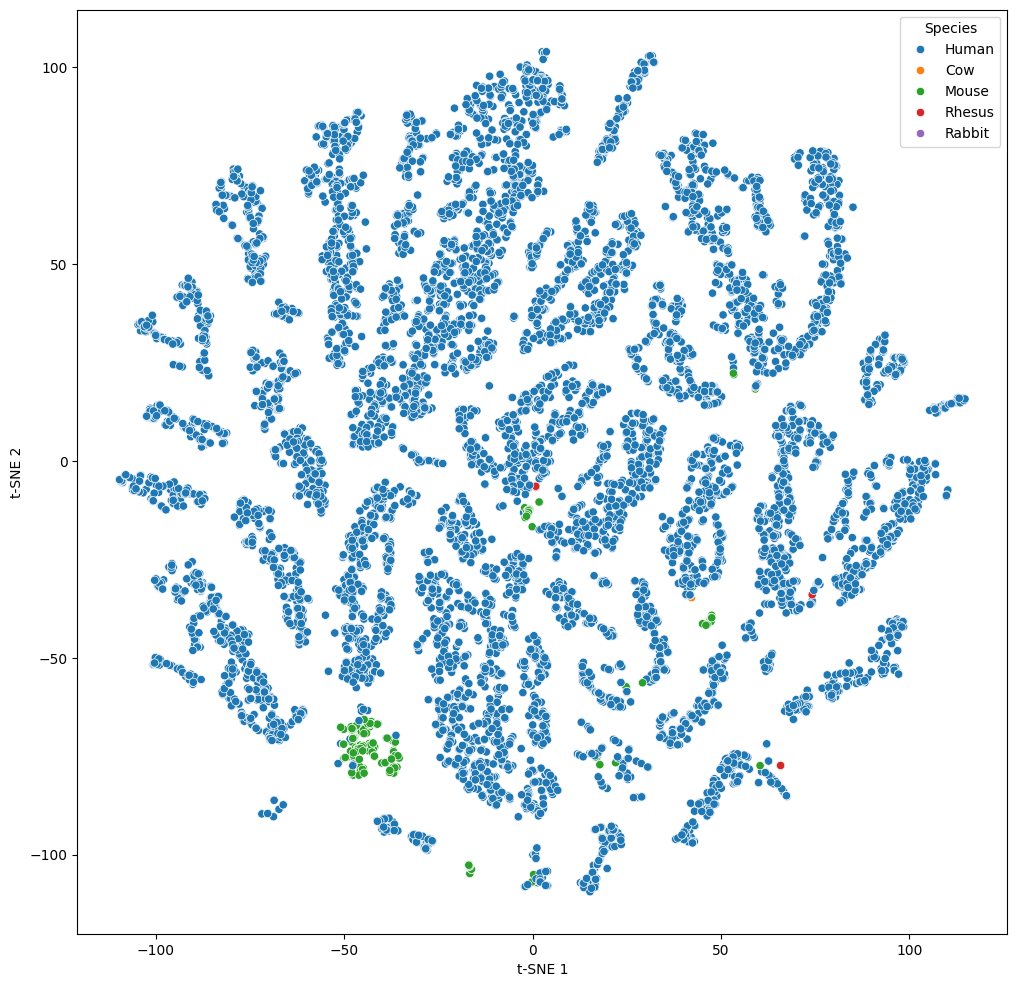

In [17]:
plt.figure(figsize=(12,12))
sns.scatterplot(
    x="t-SNE 1", y="t-SNE 2",
    hue="Species",
    data=df,
    legend="full"
)
plt.show()

In [18]:
v_genes = df["Heavy V Gene"].apply(lambda s: s.strip().split(' ')[0])
common_v_genes = v_genes.value_counts()[:30].index
common_v_genes

Index(['IGHV3-30', 'IGHV1-69', 'IGHV3-53', 'IGHV3-23', 'IGHV1-46', 'IGHV3-9',
       'IGHV5-51', 'IGHV3-33', 'IGHV4-39', 'IGHV3-30-3', 'IGHV3-66',
       'IGHV1-18', 'IGHV4-59', 'IGHV3-13', 'IGHV1-2', 'IGHV3-21', 'IGHV4-4',
       'IGHV2-5', 'IGHV3-7', 'IGHV4-31', 'IGHV3-48', 'IGHV4-34', 'IGHV1-24',
       'IGHV3-15', 'IGHV1-58', 'IGHV7-4-1', 'IGHV1-8', 'IGHV2-70', 'IGHV4-61',
       'IGHV3-11'],
      dtype='object', name='Heavy V Gene')

In [19]:
genes_by_family = common_v_genes.groupby(common_v_genes.map(lambda g: g.split('-')[0].split('S')[0]))
genes_by_family

{'IGHV1': ['IGHV1-69', 'IGHV1-46', 'IGHV1-18', 'IGHV1-2', 'IGHV1-24', 'IGHV1-58', 'IGHV1-8'], 'IGHV2': ['IGHV2-5', 'IGHV2-70'], 'IGHV3': ['IGHV3-30', 'IGHV3-53', 'IGHV3-23', 'IGHV3-9', 'IGHV3-33', 'IGHV3-30-3', 'IGHV3-66', 'IGHV3-13', 'IGHV3-21', 'IGHV3-7', 'IGHV3-48', 'IGHV3-15', 'IGHV3-11'], 'IGHV4': ['IGHV4-39', 'IGHV4-59', 'IGHV4-4', 'IGHV4-31', 'IGHV4-34', 'IGHV4-61'], 'IGHV5': ['IGHV5-51'], 'IGHV7': ['IGHV7-4-1']}

In [20]:
scales = {
    'IGHV1': 'Blues',
    'IGHV2': 'Purples',
    'IGHV3': 'Reds',
    'IGHV4': 'Greens',
    'IGHV5': 'Oranges',
    'IGHV7': 'Greys',
}
palette = {'Other': '#999999', 'ND': '#444444'}
for family, genes in genes_by_family.items():
    if family == 'ND':
        continue
    for i, gene in enumerate(genes):
        palette[gene] = plt.get_cmap(scales[family])(i / len(genes) * 0.7 + 0.4)

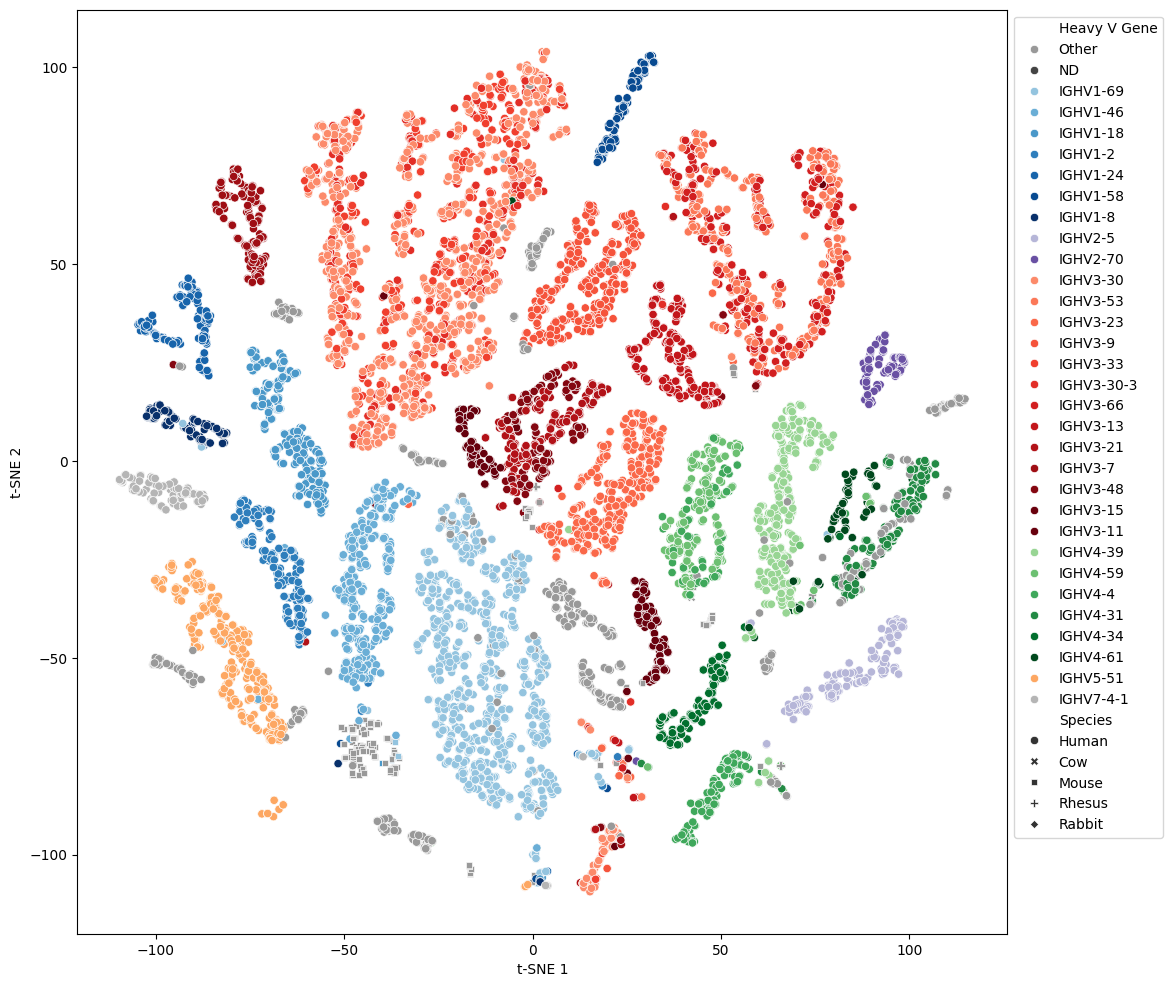

In [21]:
fig = plt.figure(figsize=(12,12))
ax = sns.scatterplot(
    x="t-SNE 1", y="t-SNE 2",
    hue=v_genes.apply(lambda g: g if g in common_v_genes else 'Other'),
    hue_order=palette.keys(),
    style='Species',
    palette=palette,
    data=df,
    legend="full"
)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [22]:
fig.savefig('Embedding_t-SNE.png', bbox_inches='tight');